In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [5]:
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [8]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


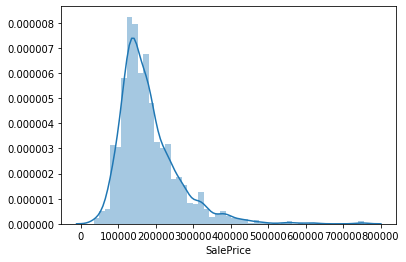

In [9]:
sns.distplot(train['SalePrice'])

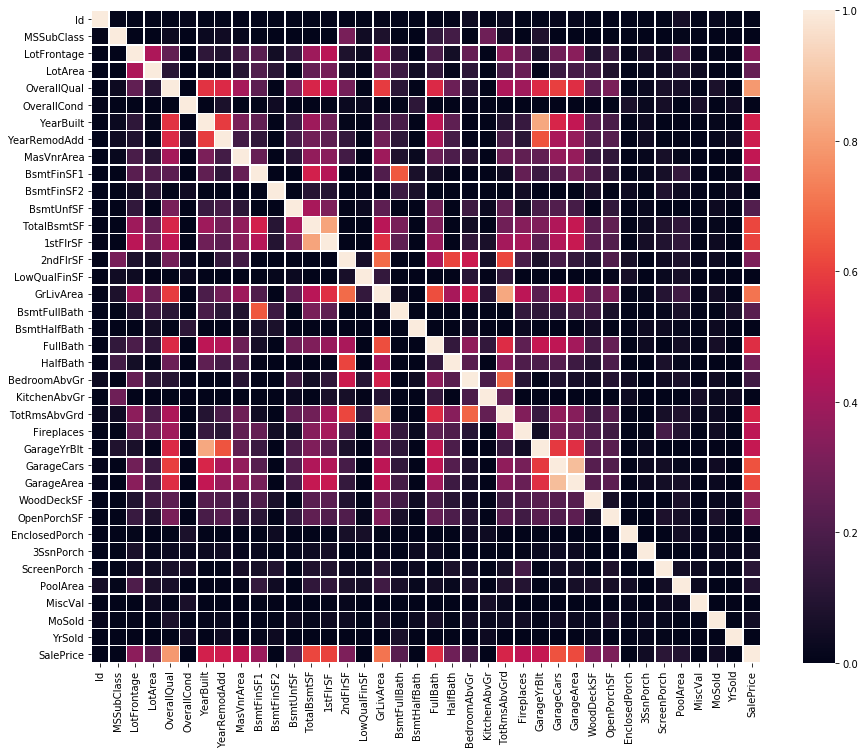

In [10]:
fig, ax = plt.subplots(figsize=(15, 12))
corr = train.corr()
sns.heatmap(corr, linewidths=.5, vmin=0, vmax=1)

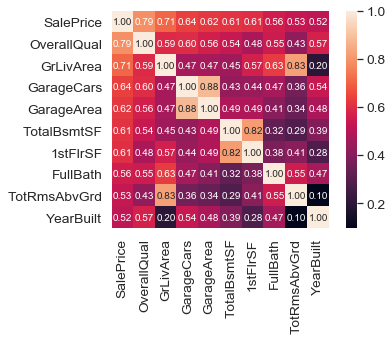

In [11]:
cols = corr.nlargest(10, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Figuren viser variablene som korrelerer mest til "SalePrice". Det vi kan se ut i fra figuren er at "OverallQual", "GrLivArea" og "TotalBsmtSF" er sterkt korrelert til "SalePrice". "GarageCars" og "GarageArea" er også sterkt korrelert til hverandre. Grunnen til dette er at har du større garasje har du plass til flere biler. Derfor kan vi forholde oss til en av disse variablene.

Ut i fra dette vil følgende variabler ha en sentral rolle i dette problemet:

OverallQual
GarageCars
YearBuilt
FullBath
TotalBsmtSF
GrLivArea

### Lineære relasjoner

In [12]:
train.drop(train[train.GrLivArea>4000].index, inplace = True)
train.reset_index(drop = True, inplace = True)

In [13]:
train.drop(train[train.TotalBsmtSF>3000].index, inplace = True)
train.reset_index(drop = True, inplace = True)

In [14]:
train.drop(train[train.YearBuilt<1900].index, inplace = True)
train.reset_index(drop = True, inplace = True)

### Imputing Missing Values

In [16]:
y_train = train.SalePrice

train.drop('SalePrice', axis = 1, inplace = True)

df_merged = pd.concat([train, test], axis = 0)

df_merged.shape

(2897, 80)

In [18]:
df_merged.loc[:,['MSSubClass', 'OverallQual', 'OverallCond', 'MoSold', 'YrSold']] = df_merged.loc[:,['MSSubClass', 'OverallQual', 'OverallCond', 'MoSold', 'YrSold']].astype('object')

df_merged.dtypes.value_counts()

object     48
int64      21
float64    11
dtype: int64

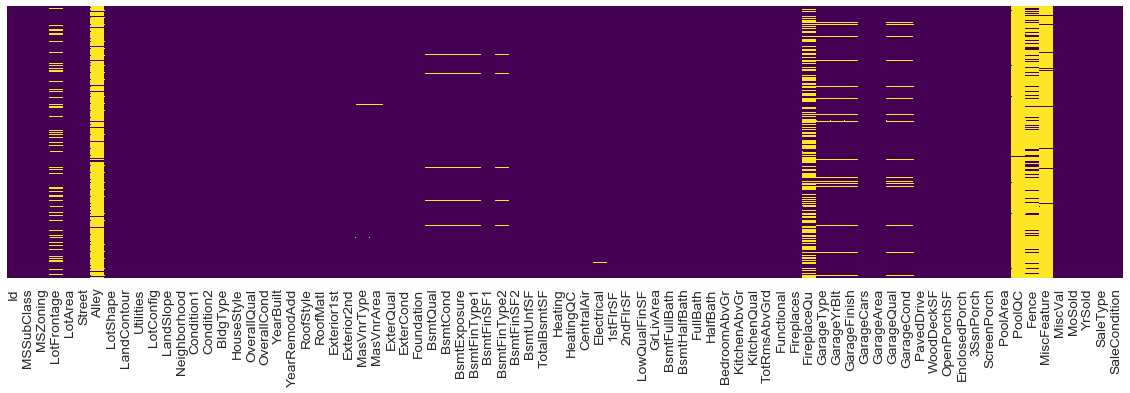

In [22]:
fig, ax = plt.subplots(figsize=(20,5))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [25]:
missing_columns = len(df_merged) - df_merged.loc[:, np.sum(df_merged.isnull())>0].count()

x = missing_columns.index
y = missing_columns

In [26]:
missing_columns

MSZoning           4
LotFrontage      485
Alley           2705
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      79
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1410
GarageType       155
GarageYrBlt      157
GarageFinish     157
GarageCars         1
GarageArea         1
GarageQual       157
GarageCond       157
PoolQC          2889
Fence           2331
MiscFeature     2793
SaleType           1
dtype: int64

Vanligvis pleier man å droppe variabler hvor vi mangler minst 40% av verdiene. 

I dette tilfellet er NaN-verdiene brukt med vilje for å beskrive visse ting, som for eksempel at NaN i Alley betyr No Alley Access.

For å unngå å droppe variabler som kan ha en betydning, gjør vi om NaN til None.

In [27]:
to_impute_by_none = df_merged.loc[:, ['PoolQC','MiscFeature','Alley', 'Fence', 'FireplaceQu', 'GarageType', 'GarageCond','GarageFinish','GarageQual','BsmtFinType2','BsmtExposure','BsmtQual','BsmtCond','BsmtFinType1','MasVnrType']]
for i in to_impute_by_none.columns:
    df_merged[i].fillna('None', inplace = True)

In [28]:
to_impute_by_mode =  df_merged.loc[:, ['Electrical', 'MSZoning','Utilities','Exterior1st','Exterior2nd','KitchenQual','Functional', 'SaleType']]
for i in to_impute_by_mode.columns:
    df_merged[i].fillna(df_merged[i].mode()[0], inplace = True)

In [29]:
to_impute_by_median = df_merged.loc[:, ['BsmtFullBath','BsmtHalfBath', 'GarageCars', 'MasVnrArea', 'GarageYrBlt', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'GarageArea']]
for i in to_impute_by_median.columns:
    df_merged[i].fillna(df_merged[i].median(), inplace = True)

In [30]:
df = df_merged.drop(columns=['Id','LotFrontage'], axis=1)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df = df.apply(le.fit_transform) # data is converted.
df.head(2)

,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,5,3,617,1,1,3,3,0,4,0,...,0,0,3,4,1,0,1,2,8,4
1,0,3,892,1,1,3,3,0,2,0,...,0,0,3,4,1,0,4,1,8,4


In [31]:
df['LotFrontage'] = df_merged['LotFrontage']

df = df.set_index('LotFrontage').reset_index()
df.head(2)

,LotFrontage,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,65.0,5,3,617,1,1,3,3,0,4,...,0,0,3,4,1,0,1,2,8,4
1,80.0,0,3,892,1,1,3,3,0,2,...,0,0,3,4,1,0,4,1,8,4


In [32]:
corr = df.corr()

display(corr['LotFrontage'].sort_values(ascending = False)[:5])
display(corr['LotFrontage'].sort_values(ascending = False)[-5:])

LotFrontage    1.000000
LotArea        0.639965
1stFlrSF       0.420257
GarageArea     0.360497
GrLivArea      0.347875
Name: LotFrontage, dtype: float64

LotConfig    -0.191054
GarageType   -0.295651
MSSubClass   -0.398100
BldgType     -0.486039
Utilities          NaN
Name: LotFrontage, dtype: float64

Vi ser at BldgType har den høyeste korrelasjonen med LotFrontage.

In [33]:
df_merged['LotFrontage'] = df_merged.groupby(['BldgType'])['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [34]:
print('Manglende verdier som ikke er behandlet: ', df_merged.columns[df_merged.isna().any()].values)

Manglende verdier som ikke er behandlet:  []


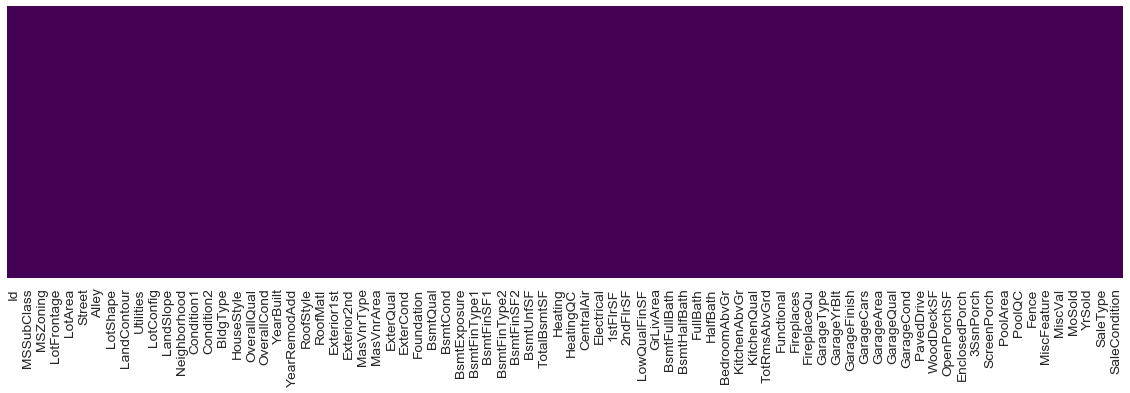

In [36]:
fig, ax = plt.subplots(figsize=(20,5))
sns.heatmap(df_merged.isnull(), yticklabels=False, cbar=False, cmap='viridis')